# Notación Big‑O en Python 3

Este cuaderno explica **Big‑O** de forma práctica y visual.

## Objetivos
- Entender qué mide Big‑O y qué *no* mide
- Identificar complejidad temporal y espacial en ejemplos comunes
- Reconocer patrones típicos: **O(1), O(log n), O(n), O(n log n), O(n²)**
- Medir (aproximadamente) tiempos con `timeit` y compararlos con el análisis teórico


## 1) ¿Qué es Big‑O?

**Big‑O** describe cómo crece el costo de un algoritmo cuando crece el tamaño de entrada `n`.

- Se enfoca en el **comportamiento asintótico** (cuando `n` es grande).
- Ignora constantes y detalles de hardware.
- Es una herramienta para comparar algoritmos *por escalabilidad*.

📌 Intuición:
- `O(n)` significa: si duplico `n`, el trabajo se duplica aproximadamente.
- `O(n²)` significa: si duplico `n`, el trabajo se multiplica ~4×.


## 2) Reglas rápidas

### A) Constantes se ignoran
- `O(2n)` → `O(n)`
- `O(100)` → `O(1)`

### B) Sumas: domina el término más grande
- `O(n) + O(n²)` → `O(n²)`

### C) Bucles anidados multiplican
- Bucle dentro de bucle (ambos sobre `n`) → `O(n²)`

### D) Partir el problema a la mitad suele dar logaritmos
- Búsqueda binaria → `O(log n)`


## 3) Tabla rápida de complejidades comunes

| Complejidad | Nombre común | Ejemplo típico |
|---|---|---|
| `O(1)` | constante | acceder a `arr[i]` |
| `O(log n)` | logarítmica | búsqueda binaria |
| `O(n)` | lineal | recorrer una lista |
| `O(n log n)` | casi lineal | mergesort, quicksort promedio |
| `O(n²)` | cuadrática | doble bucle |
| `O(2^n)` | exponencial | fuerza bruta |
| `O(n!)` | factorial | permutaciones |


## 4) Ejemplos en Python (análisis + código)

### 4.1 O(1) — constante
Acceder a una posición en una lista no depende de `n`.


In [17]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [18]:
def get_middle(arr):
    """O(1): acceso directo por índice."""
    return arr[len(arr)//2]

get_middle(list(range(10)))

5

### 4.2 O(n) — lineal
Recorrer todos los elementos es proporcional al tamaño de entrada.


In [19]:
def sum_all(arr):
    """O(n): recorre todos los elementos una vez."""
    total = 0
    for x in arr:
        total += x
    return total

sum_all([1,2,3,4])

10

### 4.3 O(n²) — cuadrática
Dos bucles anidados sobre `n` generan un crecimiento cuadrático.


In [35]:
def pairs_count(arr):
    """O(n²): cuenta pares (i, j) sin guardarlos para ahorrar memoria."""
    c = 0
    for _ in arr:
        for _ in arr:
            c += 1
    return c

pairs_count([1,2,3])

9

### 4.4 O(log n) — búsqueda binaria (lista ordenada)
Cada paso reduce el espacio de búsqueda a la mitad.


In [21]:
def binary_search(sorted_arr, target):
    """O(log n): búsqueda binaria en lista ordenada."""
    lo, hi = 0, len(sorted_arr) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        if sorted_arr[mid] == target:
            return mid
        if sorted_arr[mid] < target:
            lo = mid + 1
        else:
            hi = mid - 1
    return -1

binary_search(list(range(0, 100, 2)), 42)

21

## 5) Complejidad oculta en operaciones comunes de Python

- `arr.append(x)` → **O(1) amortizado**
- `arr.pop()` (al final) → **O(1)**
- `arr.insert(0, x)` → **O(n)** (desplaza elementos)
- `x in arr` (lista) → **O(n)**
- `x in set` / `x in dict` → **O(1) promedio**


In [22]:
data = list(range(10))
data.insert(0, 999)  # O(n)
data.pop(0)          # O(n)
data.append(111)     # O(1) amortizado
data.pop()           # O(1)
data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 6) Medición práctica con `timeit` (aproximada)

Big‑O es teoría (crecimiento). `timeit` nos ayuda a ver una señal práctica.

⚠️ Lo importante es la **tendencia**, no el número exacto.


In [23]:
import timeit

def measure_linear(n, repeats=3):
    arr = list(range(n))
    timer = timeit.Timer(lambda: sum_all(arr))
    return min(timer.repeat(repeat=repeats, number=1))

sizes = [1_000, 2_000, 4_000, 8_000]
times_linear = [measure_linear(n) for n in sizes]
list(zip(sizes, times_linear))

[(1000, 6.059999577701092e-05),
 (2000, 0.00010270002530887723),
 (4000, 0.00018889998318627477),
 (8000, 0.0003225000109523535)]

### Visualización simple (matplotlib)
Graficamos tamaños vs tiempos para observar tendencia.


Text(0, 0.5, 'segundos (aprox)')

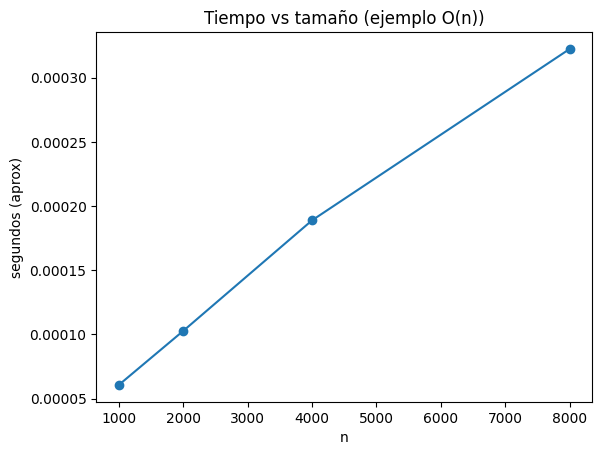

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(sizes, times_linear, marker='o')
plt.title('Tiempo vs tamaño (ejemplo O(n))')
plt.xlabel('n')
plt.ylabel('segundos (aprox)')


## 7) Comparación rápida O(n) vs O(n²)

Para que no se tarde demasiado, usamos tamaños más pequeños en `O(n²)`.


In [25]:
def measure_n2(n, repeats=3):
    arr = list(range(n))
    timer = timeit.Timer(lambda: pairs_count(arr))
    return min(timer.repeat(repeat=repeats, number=1))

sizes_n2 = [200, 400, 800, 1200]
times_n2 = [measure_n2(n) for n in sizes_n2]
list(zip(sizes_n2, times_n2))

[(200, 0.0021661000209860504),
 (400, 0.008333100005984306),
 (800, 0.017988999956287444),
 (1200, 0.04034870001487434)]

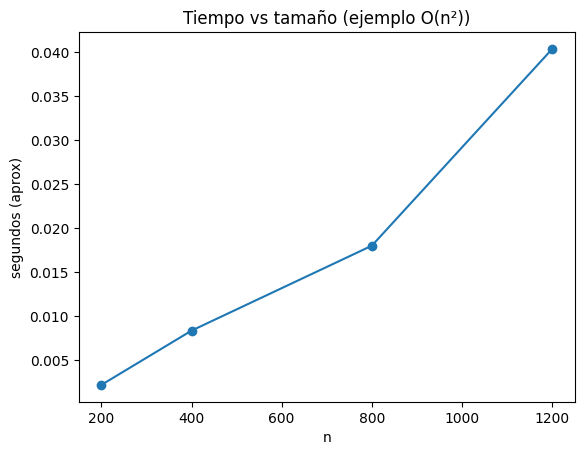

In [26]:
plt.figure()
plt.plot(sizes_n2, times_n2, marker='o')
plt.title('Tiempo vs tamaño (ejemplo O(n²))')
plt.xlabel('n')
plt.ylabel('segundos (aprox)')
plt.show()

## 8) Complejidad espacial (memoria)

Big‑O también se aplica a memoria.

- Guardar todos los pares consume `O(n²)` memoria.
- Contarlos sin guardarlos consume `O(1)` memoria adicional.


In [27]:
def all_pairs_memory(arr):
    """O(n²) tiempo y O(n²) memoria (guarda todos los pares)."""
    return [(a, b) for a in arr for b in arr]

# Usa tamaños pequeños para evitar alto consumo de memoria.
len(all_pairs_memory(list(range(200))))

40000

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.3 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.3 MB 5.9 MB/s eta 0:00:02
   --------------------------- ------------ 5.8/8.3 MB 10.3 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.3 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 10.0 MB/s  0:00:00
   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   -------- ------------------------------- 2.6/12.4 MB 18.2 MB/s eta 0:00:01
   ------------------- -------------------- 6.0/12.4 MB 16.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.4 MB 16.1 MB/s eta 0:00:01
   ---------------------------------- ----- 10.7/12.4 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 12.4/12.4 MB 12.5 MB/s  0:00:01
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -------- -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\Users\\samue\\AppData\\Local\\Python\\pythoncore-3.14-64\\Lib\\site-packages\\matplotlib\\backends\\

## 9) Ejercicios (para clase)

1. Determina el Big‑O de:
   - Un bucle que recorre `n` elementos y dentro hace una operación O(1)
   - Dos bucles anidados de `n`
   - Búsqueda en `list` vs búsqueda en `set`

2. Reescribe un ejemplo `O(n²)` a `O(n log n)` usando ordenamiento + búsqueda.

3. Identifica en tu código una operación `insert(0, x)` y cámbiala por una estructura adecuada (`collections.deque`).


1. Determina el Big‑O de:
   - Un bucle que recorre `n` elementos y dentro hace una operación O(1)
   O(n) es una operación que se ejecuta una vez por elemento.

   - Dos bucles anidados de `n`
   O(n^2) por cada iteración del primer bucle, el segundo recorre todos los elementos de n.

   - Búsqueda en `list` vs búsqueda en `set`
   En una lista se revisan los elementos de uno por uno, y en set se tiene un acceso constante a los elementos.

In [ ]:
def Multiply(arr):
    total = 1
    for x in arr:
        total *= x
    return total

Multiply([100, 200, 300])

6000000

In [36]:
def odd_count(arr):
    count = 0
    for _ in arr:
        for _ in arr:
            count += 1
    return count

odd_count([5, 10, 15, 20, 25])

25

In [37]:
def exists(sorted_arr, target):
    left = 0
    right = len(sorted_arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if sorted_arr[mid] == target:
            return True
        elif sorted_arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return False

exists([2, 4, 6, 8, 10, 12], 8)

True

## 10) Conclusiones

- Big‑O no te da el tiempo exacto, te da **la escalabilidad**.
- Para `n` grande, elegir `O(n log n)` en lugar de `O(n²)` cambia todo.
- En Python, conocer la complejidad de `list`, `set`, `dict` evita cuellos de botella.
